<a href="https://colab.research.google.com/github/otoperalias/Coyuntura/blob/main/clases/Workshop_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis computacional de texto en Python

### 1. Análisis de programas electorales
Este ejercicio consiste en crear una nube de palabras con las palabras más repetidas de cada programa electoral, donde el tamaño de cada palabra representa la frecuencia con la que aparece.  
Las nubes de palabran dan información sobre los temas más tratados en cada programa electoral.

In [ ]:
# Instalamos las librerías que vamos a usar y no están preinstaladas en Colab
!pip install PyPDF2
!pip install wordcloud

In [4]:
# Importamos las librerías que vamos a usar
import PyPDF2
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

El programa de PP tiene  102 páginas


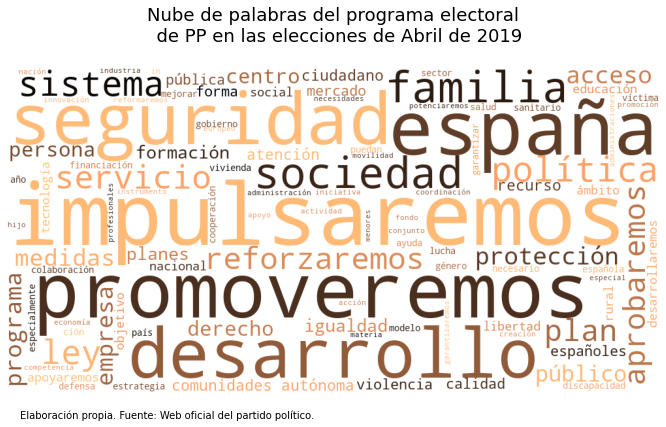

('impulsaremos', 90)
('promoveremos', 71)
('españa', 68)
('nacional', 59)
('plan', 59)
('seguridad', 58)
('•', 58)
('desarrollo', 56)
('sociedad', 51)
('servicios', 51)


<Figure size 432x288 with 0 Axes>

In [27]:
# Descargamos, descomprimimos y subimos los ficheros de programas electorales a Colab:
# Los programas están disponibles aquí: https://github.com/otoperalias/Coyuntura/blob/main/clases/datos/textos/programas_electo.rar
# Descargamos también y subimos a Colab el fichero txt con las stopwords: https://github.com/otoperalias/Coyuntura/blob/main/clases/datos/textos/stopwords-es.txt

partidos=["PP", "PSOE", "PODEMOS", "CIUDADANOS", "VOX"][:1]
for p in partidos:
    file = open(p+'.pdf', 'rb')
        
    # Creamos un pdf reader object
    freader = PyPDF2.PdfFileReader(file)
    
    # Imprimimos el número de páginas de cada programa
    print("El programa de "+p+" tiene", freader.numPages, "páginas")
    
    # variable string que contiene el texto del programa
    text=""
    for page in freader.pages:
        text+=page.extractText()
    text=text.replace('\n', ' ') 
    text=text.replace('-', '') 
    text=text.lower() # lo ponemos todo en minúsculas
    
    #WORDCLOUD
    stopw=open('stopwords-es.txt','r', encoding='utf-8').read()  #stopwords in Spanish
    stopw_list = list(stopw.split(" ")) 
        
    wordcloud = WordCloud(width = 1000, height = 500,background_color="white", colormap="copper", max_words=100, stopwords=stopw_list).generate_from_text(text)
    
    # Display the generated image:
    fig, ax=plt.subplots(figsize=(12,6))
    ax.imshow(wordcloud)
    ax.axis("off")
    ax.set_title("Nube de palabras del programa electoral\n de "+p+" en las elecciones de Abril de 2019\n ", size=18)
    fig.text(0.15,0.07,"Elaboración propia. Fuente: Web oficial del partido político.")
    plt.show()
    plt.savefig(p+'.png', bbox_inches='tight')    
    
    # 10 most frequent words
    text_list=text.split()
    for sw in stopw_list:
        while sw in text_list:
            text_list.remove(sw)
    c = Counter(text_list)
    print(*c.most_common(10), sep="\n")


### 2. Análisis de los debates sobre el Estado de la Nación
Este ejercicio consiste en analizar los temas tratados en el último debate sobre el Estado de la Nación